# Processing Data and Creating Model

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# spotify_songs

In [2]:
# Read the csv file into a pandas DataFrame
songs_df = pd.read_csv(Path("Resources/spotify_songs.csv"))

# Review the DataFrame
songs_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
count_rows = songs_df["track_id"].nunique()
count_rows

28356

In [4]:
songs_df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [5]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
plist_count = songs_df.groupby("playlist_name").mean("track_popularity")

plist_count

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
playlist_name,,,,,,,,,,,,,
"""Permanent Wave""",36.913043,0.661739,0.717652,3.434783,-10.113000,0.869565,0.041752,0.083219,0.111289,0.153474,0.756957,116.941739,264731.434783
10er Playlist,69.409836,0.687246,0.701852,4.754098,-5.584574,0.540984,0.090395,0.148498,0.013975,0.151510,0.524885,118.873754,226640.459016
1987-1997 OLD SKOOL JAMZ,28.268293,0.706220,0.702000,5.219512,-7.841927,0.634146,0.057349,0.150592,0.007288,0.138524,0.680976,115.276244,267173.951220
2000's hard rock,50.111111,0.437867,0.899000,5.311111,-4.669733,0.600000,0.089822,0.003040,0.085999,0.197442,0.466978,135.526022,236318.777778
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 - 2018 - 2019 - 2020 TOP HITS,67.831325,0.678096,0.687265,5.132530,-5.529735,0.578313,0.087506,0.157075,0.000574,0.190606,0.536092,118.667337,209442.168675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
💊ELECTRO-HOUSE-TECH💊,33.846939,0.773459,0.781939,5.969388,-7.243786,0.724490,0.085595,0.027674,0.552659,0.132785,0.394654,124.121663,293316.122449
🔊BASSBOOSTED🔊⚡ELECTRO HOUSE⚡🔥EDM CAR MUSIC2018/2019🔥,39.752577,0.745505,0.741299,5.175258,-6.433072,0.556701,0.114460,0.126910,0.178364,0.196997,0.336542,123.968804,201409.505155
"🔥💵 Hip Hop, Rap, Heavy 808's - New School",32.787879,0.753364,0.620212,4.272727,-6.727707,0.606061,0.225221,0.151653,0.000812,0.183241,0.361219,128.675162,218094.313131


In [7]:
plist_genre_ct = songs_df.groupby("playlist_genre").mean("track_popularity")
plist_genre_ct

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
playlist_genre,,,,,,,,,,,,,
edm,34.833526,0.655041,0.802476,5.352143,-5.427445,0.520106,0.086695,0.081504,0.218578,0.211859,0.400656,125.768024,222540.858349
latin,47.026576,0.713287,0.708312,5.483996,-6.264455,0.561979,0.102653,0.210920,0.044447,0.180626,0.605510,118.622354,216863.446945
pop,47.744870,0.639302,0.701028,5.318867,-6.315328,0.588161,0.073991,0.170794,0.059876,0.176833,0.503521,120.743178,217768.104231
r&b,41.223532,0.670179,0.590934,5.400479,-7.864848,0.521451,0.116792,0.259904,0.028920,0.175268,0.531231,114.222156,237599.489781
rap,43.215454,0.718353,0.650708,5.470936,-7.042269,0.521406,0.197506,0.192479,0.075997,0.191654,0.505090,120.654908,214163.889140
rock,41.728338,0.520548,0.732813,5.209049,-7.588895,0.700263,0.057696,0.145189,0.062417,0.203135,0.537352,124.988786,248576.500303


In [8]:
genre_v_popular = plist_genre_ct.drop(columns=[
                    "danceability",
                     "energy",
                     "loudness",
                     "speechiness",
                     "acousticness",
                    "instrumentalness",
                    "liveness",
                    "valence",
                    "tempo",
                    "duration_ms",
                    "key",
                    "mode"])
genre_v_popular

,track_popularity
playlist_genre,
edm,34.833526
latin,47.026576
pop,47.744870
r&b,41.223532
rap,43.215454
rock,41.728338


Text(0.5, 1.0, 'Popularity by Genre')

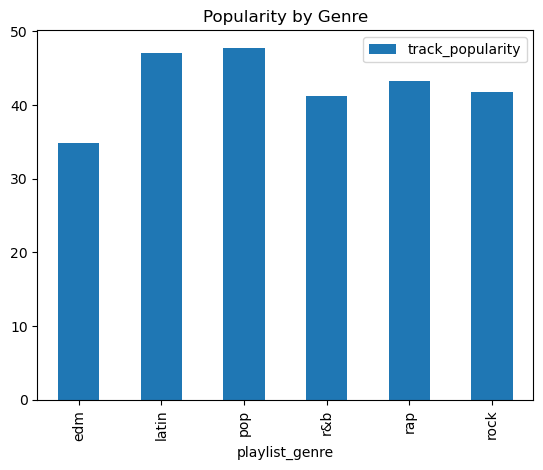

In [9]:
genre_v_popular.plot(kind="bar")

plt.title("Popularity by Genre")

In [8]:
averages = songs_df[["track_popularity",
                     "danceability",
                     "energy",
                     "loudness",
                     "speechiness",
                     "acousticness",
                    "instrumentalness",
                    "liveness",
                    "valence",
                    "tempo",
                    "duration_ms"]].mean()
averages

track_popularity        42.477081
danceability             0.654850
energy                   0.698619
loudness                -6.719499
speechiness              0.107068
acousticness             0.175334
instrumentalness         0.084747
liveness                 0.190176
valence                  0.510561
tempo                  120.881132
duration_ms         225799.811622
dtype: float64

In [18]:
# Include artist's name
# clean_songs_df = songs_df[['track_id','track_artist','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#        'duration_ms','track_popularity']]
# clean_songs_df.index = clean_songs_df["track_id"]
# clean_songs_df = clean_songs_df.drop("track_id", axis=1)
# clean_songs_df.head()
# clean_songs_df = pd.get_dummies(scaled_songs_df, dtype=int)
# clean_songs_df.head()

# Exclude artist's name, track_popularity

# clean_songs_df = songs_df[['track_id','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#        'duration_ms']]
# clean_songs_df.index = clean_songs_df["track_id"]
# clean_songs_df = clean_songs_df.drop("track_id", axis=1)
# clean_songs_df.head()


# Spotify 2023

In [10]:
# Read the csv file into a pandas DataFrame
spotify_2023_df = pd.read_csv("Resources/spotify_2023.csv", encoding = 'latin-1')

# Review the DataFrame
spotify_2023_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [11]:
spotify_2023_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [13]:
top_songs = spotify_2023_df.groupby('track_name')
top_songs

# Top 50 in 2023

In [16]:
# Read the csv file into a pandas DataFrame
top_50_df = pd.read_csv("Resources/top_50_2023.csv", encoding = 'latin-1')

# Review the DataFrame
top_50_df.head()

,artist_name,track_name,is_explicit,album_release_date,genres,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity
0,Miley Cyrus,Flowers,False,2023-08-18,['pop'],0.706,0.632,0.691,-4.775,0.0584,0.000070,0.0232,0.0633,0,118.048,1,200600,4,94
1,SZA,Kill Bill,False,2022-12-08,"['pop', 'r&b', 'rap']",0.644,0.418,0.735,-5.747,0.0521,0.144000,0.1610,0.0391,8,88.980,1,153947,4,86
2,Harry Styles,As It Was,False,2022-05-20,['pop'],0.520,0.662,0.731,-5.338,0.3420,0.001010,0.3110,0.0557,6,173.930,0,167303,4,95
3,Jung Kook,Seven (feat. Latto) (Explicit Ver.),True,2023-11-03,['k-pop'],0.790,0.872,0.831,-4.185,0.3120,0.000000,0.0797,0.0440,11,124.987,1,183551,4,90
4,Eslabon Armado,Ella Baila Sola,False,2023-04-28,"['corrido', 'corridos tumbados', 'sad sierreno...",0.668,0.834,0.758,-5.176,0.4830,0.000019,0.0837,0.0332,5,147.989,0,165671,3,86


In [17]:
top_50_df.columns

Index(['artist_name', 'track_name', 'is_explicit', 'album_release_date',
       'genres', 'danceability', 'valence', 'energy', 'loudness',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'key',
       'tempo', 'mode', 'duration_ms', 'time_signature', 'popularity'],
      dtype='object')

In [19]:
top_artist = top_50_df.index('artist_name').count()

TypeError: 'RangeIndex' object is not callable